In [225]:
from pandasql import sqldf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [226]:
# Read input data
train = pd.read_csv('data/train.zip', compression='zip')
test = pd.read_csv('data/test.csv')
stores = pd.read_csv('data/stores.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')
oil = pd.read_csv('data/oil.csv')
holidays_events = pd.read_csv('data/holidays_events.csv')
transactions = pd.read_csv('data/transactions.csv')

In [227]:
print("Train Data:")
print(train.head())
print(train.describe())
print(train.info())

print("\nTest Data:")
print(test.head())
print(test.describe())
print(test.info())

print("\nStores Data:")
print(stores.head())
print(stores.describe())
print(stores.info())

print("\nOil Data:")
print(oil.head())
print(oil.describe())
print(oil.info())

print("\nHolidays and Events Data:")
print(holidays_events.head())
print(holidays_events.describe())
print(holidays_events.info())

print("\nTransactions Data:")
print(transactions.head())
print(transactions.describe())
print(transactions.info())

print("\nSample Submission:")
print(sample_submission.head())

Train Data:
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0
                 id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entrie

## Data Preprocessing

### Handle missing values

In [228]:
# Find missing values:

print("Train Data:")
print(train.isnull().sum())

print("\nTest Data:")
print(test.isnull().sum())

print("\nStores Data:")
print(stores.isnull().sum())

print("\nOil Data:")
print(oil.isnull().sum())

print("\nHolidays and Events Data:")
print(holidays_events.isnull().sum())

print("\nTransactions Data:")
print(transactions.isnull().sum())

Train Data:
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Test Data:
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

Stores Data:
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

Oil Data:
date           0
dcoilwtico    43
dtype: int64

Holidays and Events Data:
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

Transactions Data:
date            0
store_nbr       0
transactions    0
dtype: int64


#### Missing values in Oil

In [229]:
oil.head(16)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


In [230]:
# dcoilwtico mean
oil['dcoilwtico'].mean()

67.71436595744682

In [231]:
# fill missing values with interpolate
oil['dcoilwtico'] = oil['dcoilwtico'].interpolate()

# Find missing values
print(oil.isnull().sum())

date          0
dcoilwtico    1
dtype: int64


In [232]:
oil[oil.isna().any(axis=1)]

,date,dcoilwtico
0,2013-01-01,NaN


In [233]:
# bfill to clean 1st entry as nan
oil['dcoilwtico'] = oil['dcoilwtico'].bfill()

# Find missing values
print(oil.isnull().sum())

date          0
dcoilwtico    0
dtype: int64


In [234]:
oil.head(16)

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


### Find inconsistencies

In [235]:
# Find duplicate rows

print(f"duplicates in train are: {len(train[train.duplicated()])}")
print(f"duplicates in test are: {len(test[test.duplicated()])}")
print(f"duplicates in stores are: {len(stores[stores.duplicated()])}")
print(f"duplicates in oil are: {len(oil[oil.duplicated()])}")
print(f"duplicates in holidays_events are: {len(holidays_events[holidays_events.duplicated()])}")
print(f"duplicates in transactions are: {len(transactions[transactions.duplicated()])}")

duplicates in train are: 0
duplicates in test are: 0
duplicates in stores are: 0
duplicates in oil are: 0
duplicates in holidays_events are: 0
duplicates in transactions are: 0


In [236]:
# Find negative sales
print("Negative sales count in train:", (train['sales'] < 0).sum())

Negative sales count in train: 0


In [237]:
# Find is stores match between dataset
print("Stores in train but not in stores.csv:", set(train['store_nbr']) - set(stores['store_nbr']), )
print("Stores in test but not in stores.csv:", set(test['store_nbr']) - set(stores['store_nbr']))
print("Stores in transactions but not in stores.csv:", set(transactions['store_nbr']) - set(stores['store_nbr']))

Stores in train but not in stores.csv: set()
Stores in test but not in stores.csv: set()
Stores in transactions but not in stores.csv: set()


All the data is cleaned and there are not inconsistencies.

## Exploratory Data Analysis

In [238]:
# date to datetime
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays_events['date'] = pd.to_datetime(holidays_events['date'])
transactions['date'] = pd.to_datetime(transactions['date'])

In [239]:
# Range from dates
print("Train date range:", train['date'].min(), "to", train['date'].max())
print("Test date range:", test['date'].min(), "to", test['date'].max())

Train date range: 2013-01-01 00:00:00 to 2017-08-15 00:00:00
Test date range: 2017-08-16 00:00:00 to 2017-08-31 00:00:00


In [240]:
# Unique values from store_nbr
print("stores:", train['store_nbr'].nunique())

stores: 54


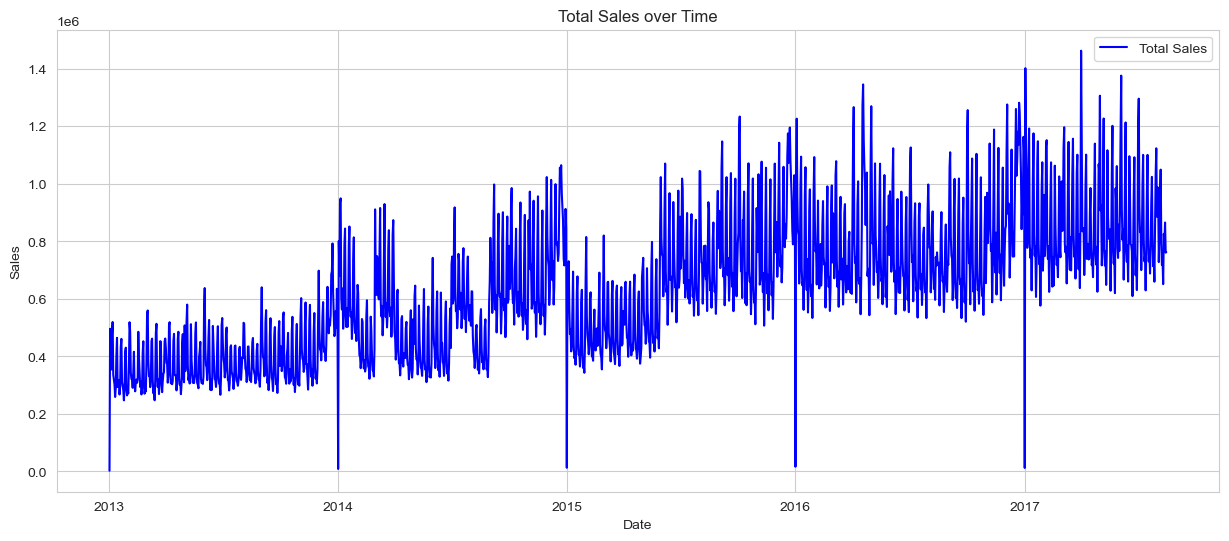

In [241]:
# Total Sales Over Time
daily_sales = train.groupby('date')['sales'].sum().reset_index()

sb.set_style("whitegrid")
plt.figure(figsize=(15, 6))
sb.lineplot(data=daily_sales, x='date', y='sales', color='blue', label="Total Sales")
plt.title("Total Sales over Time")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.show()

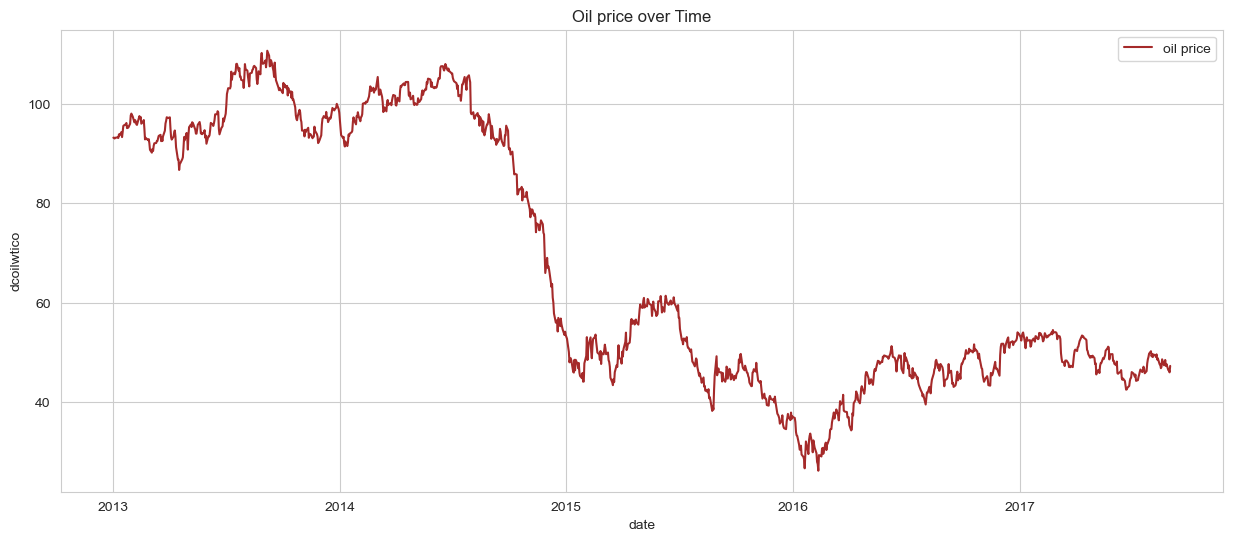

In [242]:
# Lineplot from oil over time
plt.figure(figsize=(15,6))
sb.lineplot(data=oil, y='dcoilwtico', x='date', color='brown', label="oil price")
plt.title("Oil price over Time") 
plt.show()

In [243]:
# Grouping by Stores (TOP)
top_store_sales = train.groupby('store_nbr')[['sales']].sum().sort_values('sales', ascending=False).head(5)
print(top_store_sales)

                  sales
store_nbr              
44         6.208755e+07
45         5.449801e+07
47         5.094831e+07
3          5.048191e+07
49         4.342010e+07


In [244]:
# Grouping by Stores (BOTTOM)
bottom_store_sales = train.groupby('store_nbr')[['sales']].sum().sort_values('sales', ascending=True).head(5)
print(bottom_store_sales)

                  sales
store_nbr              
52         2.696170e+06
22         4.090202e+06
32         5.951796e+06
30         7.382074e+06
35         7.676679e+06


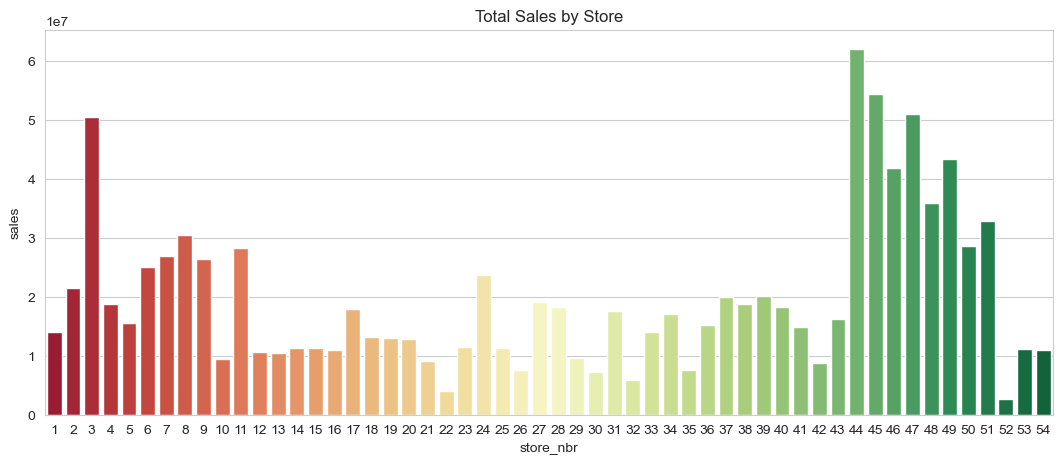

In [245]:
# Grouping by Stores
store_sales = train.groupby('store_nbr')[['sales']].sum()

# Barplot from total sales by store
plt.figure(figsize=(13,5))
sb.barplot(data=store_sales, y='sales', x='store_nbr', palette='RdYlGn')
plt.title("Total Sales by Store")
plt.show()

## Feature Engineering

In [246]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [247]:
# Find holidays transferred
holidays_events[holidays_events['transferred']]

,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
255,2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
268,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
297,2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
303,2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,True
312,2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
324,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True


# Handle holiday dataset 

In [248]:
print(holidays_events.shape)
holidays_events.head()

(350, 6)


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [249]:
holidays_events['type'].value_counts()

type
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: count, dtype: int64

In [250]:
holidays_events.drop(holidays_events[(holidays_events['type'] == 'Work Day') | (holidays_events['transferred'] == True)].index,inplace=True)
holidays_events.drop('transferred', axis=1, inplace=True)

holidays_events['type'].value_counts()

type
Holiday       209
Event          56
Additional     51
Transfer       12
Bridge          5
Name: count, dtype: int64

In [251]:
holidays_events['holiday_flg'] =1 

# Merge datasets

In [252]:
#merged holiday and oil data with train data
exclude_col = 'date'

new_columns = {col: col + '_holiday' for col in holidays_events.columns if col != exclude_col}

holidays_events = holidays_events.rename(columns=new_columns)


merged_df = pd.merge(train, holidays_events, on='date', how='left')
merged_df = pd.merge(merged_df, oil, on='date', how='left')

merged_df.head()

,id,date,store_nbr,family,sales,onpromotion,type_holiday,locale_holiday,locale_name_holiday,description_holiday,holiday_flg_holiday,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,1.0,93.14
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,1.0,93.14
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,1.0,93.14
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,1.0,93.14
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,1.0,93.14


In [253]:
print(merged_df.shape)
merged_df.isnull().sum()

(3052566, 12)


id                           0
date                         0
store_nbr                    0
family                       0
sales                        0
onpromotion                  0
type_holiday           2574990
locale_holiday         2574990
locale_name_holiday    2574990
description_holiday    2574990
holiday_flg_holiday    2574990
dcoilwtico              876744
dtype: int64

In [254]:
merged_df[merged_df['dcoilwtico'].isnull()]

,id,date,store_nbr,family,sales,onpromotion,type_holiday,locale_holiday,locale_name_holiday,description_holiday,holiday_flg_holiday,dcoilwtico
7128,7128,2013-01-05,1,AUTOMOTIVE,5.000,0,NaN,NaN,NaN,NaN,NaN,NaN
7129,7129,2013-01-05,1,BABY CARE,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN
7130,7130,2013-01-05,1,BEAUTY,3.000,0,NaN,NaN,NaN,NaN,NaN,NaN
7131,7131,2013-01-05,1,BEVERAGES,1160.000,0,NaN,NaN,NaN,NaN,NaN,NaN
7132,7132,2013-01-05,1,BOOKS,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3048997,2997319,2017-08-13,9,POULTRY,412.458,0,NaN,NaN,NaN,NaN,NaN,NaN
3048998,2997320,2017-08-13,9,PREPARED FOODS,105.169,1,NaN,NaN,NaN,NaN,NaN,NaN
3048999,2997321,2017-08-13,9,PRODUCE,1693.607,7,NaN,NaN,NaN,NaN,NaN,NaN
3049000,2997322,2017-08-13,9,SCHOOL AND OFFICE SUPPLIES,200.000,8,NaN,NaN,NaN,NaN,NaN,NaN


In [255]:
#Handle missing values of merged data by filling 'not holiday'
columns_to_fill = ['type_holiday', 'locale_holiday', 'locale_name_holiday', 'description_holiday']
merged_df[columns_to_fill] = merged_df[columns_to_fill].fillna('Not holiday')
merged_df['holiday_flg_holiday'] = merged_df['holiday_flg_holiday'].fillna(0)

In [256]:
#oil price data which is dcoilwtico have some missing dates, so fill them by mean of value of previous/next date
date_oil = merged_df[['date', 'dcoilwtico']].drop_duplicates(subset='date')
date_oil = date_oil.sort_values('date').reset_index(drop=True)

date_oil['dcoilwtico'] = date_oil['dcoilwtico'].interpolate(method='linear', limit_direction='both')
date_oil.head()

,date,dcoilwtico
0,2013-01-01,93.140000
1,2013-01-02,93.140000
2,2013-01-03,92.970000
3,2013-01-04,93.120000
4,2013-01-05,93.146667


In [257]:
merged_df = merged_df.drop(columns=['dcoilwtico'])

merged_df = pd.merge(merged_df, date_oil, on='date', how='left')
print(merged_df.shape)
merged_df.isnull().sum()

(3052566, 12)


id                     0
date                   0
store_nbr              0
family                 0
sales                  0
onpromotion            0
type_holiday           0
locale_holiday         0
locale_name_holiday    0
description_holiday    0
holiday_flg_holiday    0
dcoilwtico             0
dtype: int64

In [258]:
pwd

'/Users/hina/[301] Machine Learning/Lab/final_project_salesprice/Final-Project-Machine-Learning'